# 10. 머신러닝 프로젝트

Airbnb(New York City)
- https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

미국 NYC Airbnb 목록(2019)

프로젝트 목적: 가격 예측(price)

제공 데이터(3개): train.csv, test.csv, y_test(최종 채점용)

평가 방식: MSE (평균제곱오차/ 실제 값과 예측 값 차이 ->제곱해 평균)

<참고> : 6. 지도학습(회귀) 노드의 6-8. 평가(회귀) 스텝에서 복습하실 수 있습니다.

데이터 출처 바로가기 / License CC0: Public Domain


In [79]:
# 1. Baseline
# 라이브러리
import pandas as pd

In [80]:
# 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test1.csv')

In [81]:
#2.2. EDA(탐색적 데이터 분석)
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [82]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [83]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [84]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [85]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<Axes: >

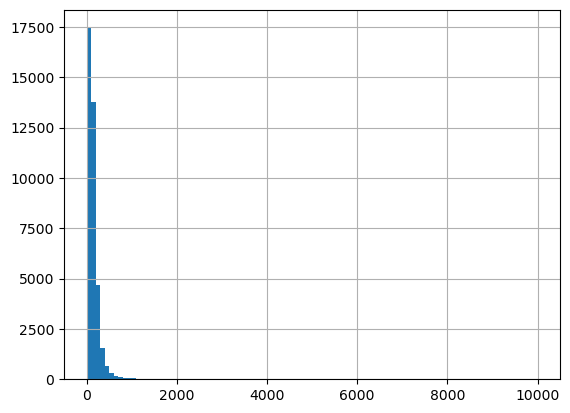

In [86]:
# target(hist)
train['price'].hist(bins=100)

In [87]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [88]:
# 피처(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

In [89]:
#3. 데이터 전처리
# 데이터를 살펴보고 판단하여 결측치 및 이상치를 처리

In [90]:
# 결측치 컬럼 삭제(last_review)
train.drop('last_review', axis=1, inplace=True)
test.drop('last_review', axis=1, inplace=True)

In [91]:
# 결측치 채우기
train['reviews_per_month'].fillna(0, inplace=True)
train['name'].fillna(0, inplace=True)
train['host_name'].fillna(0, inplace=True)
test['reviews_per_month'].fillna(0, inplace=True)
test['name'].fillna(0, inplace=True)
test['host_name'].fillna(0, inplace=True)

In [92]:
# 결측치 확인
train.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [93]:
test.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [94]:
# 가격 값 복사
train['price_copy'] = train['price'].copy()

In [95]:
# 수치형 피처 선택
numerical_features = train.dtypes[train.dtypes != 'object'].index

In [96]:
# 4. 검증 데이터 분리
# Train 데이터로 학습(훈련), Validation(검증용) 데이터로 예측 성능 평가
X_train = train.drop('price_copy', axis=1)
y_train = train['price_copy']
# test 데이터에서 입력은 전체 컬럼, 출력은 존재하지 않음


In [97]:
# 5. 머신러닝
# <참고> : 6. 지도학습(회귀) 노드에서 프로젝트에 활용된 회귀 모델을 복습하실 수 있습니다.
# 머신러닝(회귀)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
model = LinearRegression()

X_test = test
# 모델 학습 후, 예측 결과로만 출력(y_test) 구성
y_test = model.predict(X_test)
model.fit(X_train, y_train)
pred = model.predict(X_valid)
print(accuracy_score(y_valid, pred))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.